<a href="https://colab.research.google.com/github/Rafinze/NeuralNetworkProjects/blob/main/trabalho_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Convolucional
*Rafael Pires Moreira Silva - 163978*

Implementar uma rede CNN
1. Usar MNIST, MNIST-Fashion, ou CIFAR-10 (ou outro dataset)

2. Avaliar diferentes topologias (>5 topologias) e parâmetros
3. Calcular a matriz de confusão para os dois melhores modelos
4.  Avaliar a diferença entre os modelos (top-2)

5. Treinar uma rede MLP (já implementada no trabalho anterior) e
comparar com a rede CNN gerada: acurácia e número de
parâmetros

Primeiramente, vamos realizar a importação das bibliotecas que serão utilizadas ao longo do projeto.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
def get_data_loaders(batch_size=64):

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_dataset = datasets.KMNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.KMNIST(root='./data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

In [ ]:
class CNN_Model1(nn.Module):
    def __init__(self):
        super(CNN_Model1, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CNN_Model2(nn.Module):
    def __init__(self):
        super(CNN_Model2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CNN_Model3(nn.Module):
    def __init__(self):
        super(CNN_Model3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CNN_Model4(nn.Module):
    def __init__(self):
        super(CNN_Model4, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CNN_Model5(nn.Module):
    def __init__(self):
        super(CNN_Model5, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
class MLP_Model(nn.Module):
    def __init__(self):
        super(MLP_Model, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
def train_model(model, train_loader, epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    model.train()
    for epoch in range(epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = 100 * correct / total
    return accuracy, all_labels, all_preds

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def plot_confusion_matrix(cm, classes, title='Matriz de Confusão', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Rótulo Verdadeiro')
    plt.xlabel('Rótulo Previsto')
    plt.show()

In [ ]:
train_loader, test_loader = get_data_loaders()
class_names = [str(i) for i in range(10)]

cnn_models = {
    "CNN Modelo 1": CNN_Model1(),
    "CNN Modelo 2": CNN_Model2(),
    "CNN Modelo 3": CNN_Model3(),
    "CNN Modelo 4": CNN_Model4(),
    "CNN Modelo 5": CNN_Model5(),
}

cnn_accuracies = {}
for name, model in cnn_models.items():
    print(f"Treinando {name}...")
    train_model(model, train_loader)
    accuracy, _, _ = evaluate_model(model, test_loader)
    cnn_accuracies[name] = accuracy
    print(f"Acuracia da {name}: {accuracy:.2f}%")
    print(f"Nmero de parâmetros da {name}: {count_parameters(model)}")
    print("-" * 30)

Iniciando treinamento e avaliação das Redes CNN...

Treinando CNN Modelo 1...
Acurácia da CNN Modelo 1: 94.54%
Número de parâmetros da CNN Modelo 1: 206922
------------------------------
Treinando CNN Modelo 2...
Acurácia da CNN Modelo 2: 95.58%
Número de parâmetros da CNN Modelo 2: 421642
------------------------------
Treinando CNN Modelo 3...
Acurácia da CNN Modelo 3: 95.72%
Número de parâmetros da CNN Modelo 3: 857738
------------------------------
Treinando CNN Modelo 4...
Acurácia da CNN Modelo 4: 95.62%
Número de parâmetros da CNN Modelo 4: 426122
------------------------------
Treinando CNN Modelo 5...


Os dois melhores modelos CNN são: CNN Modelo 5 e CNN Modelo 2

Gerando Matriz de Confusão para CNN Modelo 5...


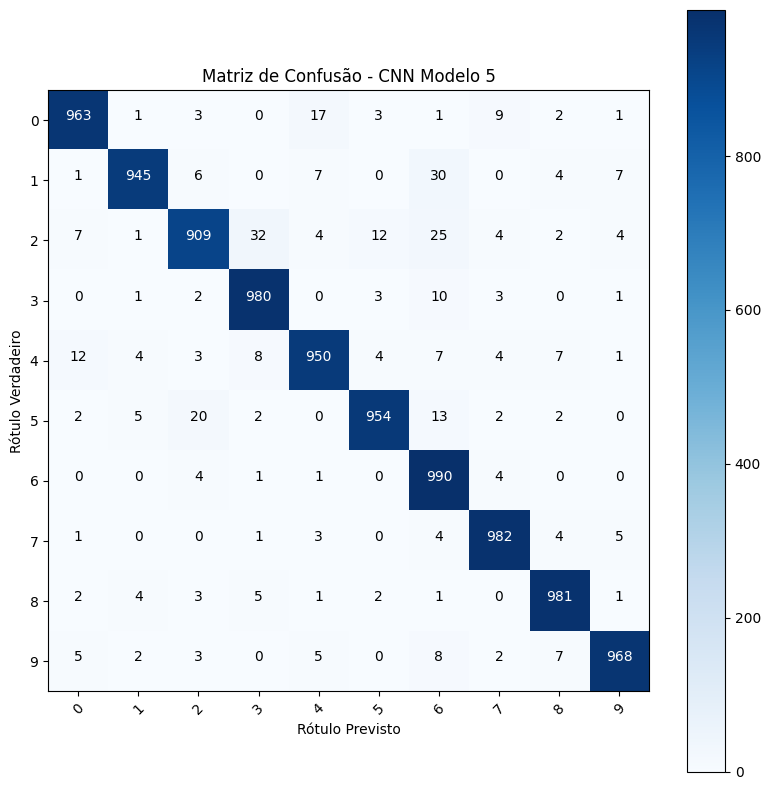

Gerando Matriz de Confusão para CNN Modelo 2...


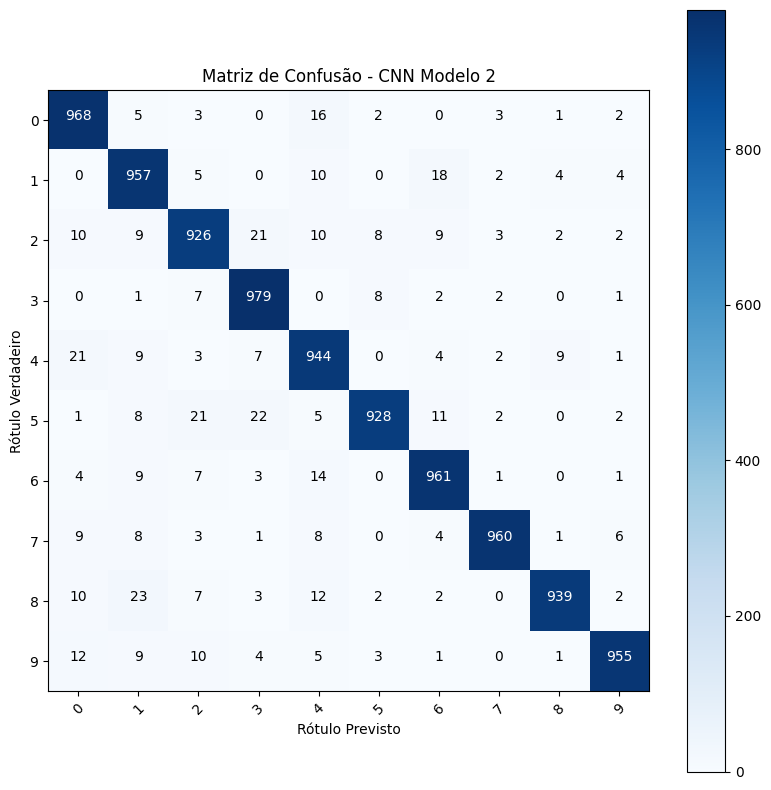


Avaliando a diferença entre os dois melhores modelos:
Acurácia do CNN Modelo 5: 96.22%
Acurácia do CNN Modelo 2: 95.17%
Diferença de acurácia: 1.05%


In [ ]:
sorted_cnn_models = sorted(cnn_accuracies.items(), key=lambda item: item[1], reverse=True)
best_cnn_model_name_1 = sorted_cnn_models[0][0]
best_cnn_model_name_2 = sorted_cnn_models[1][0]

print(f"Os dois melhores modelos CNN são: {best_cnn_model_name_1} e {best_cnn_model_name_2}\n")

best_model_1 = cnn_models[best_cnn_model_name_1]
best_model_2 = cnn_models[best_cnn_model_name_2]

print(f" Matriz de Confusão para {best_cnn_model_name_1}...")
accuracy1, labels1, preds1 = evaluate_model(best_model_1, test_loader)
cm1 = confusion_matrix(labels1, preds1)
plot_confusion_matrix(cm1, classes=class_names, title=f'Matriz de Confusão - {best_cnn_model_name_1}')

print(f"Matriz de Confusão para {best_cnn_model_name_2}...")
accuracy2, labels2, preds2 = evaluate_model(best_model_2, test_loader)
cm2 = confusion_matrix(labels2, preds2)
plot_confusion_matrix(cm2, classes=class_names, title=f'Matriz de Confusão - {best_cnn_model_name_2}')

print(f"\nAvaliando a diferença entre os dois melhores modelos:")
print(f"Acurácia do {best_cnn_model_name_1}: {accuracy1:.2f}%")
print(f"Acurácia do {best_cnn_model_name_2}: {accuracy2:.2f}%")
print(f"Diferença de acuráncia: {abs(accuracy1 - accuracy2):.2f}%")

In [ ]:
print("Treinando a Rede MLP...")
mlp_model = MLP_Model()
train_model(mlp_model, train_loader)
mlp_accuracy, _, _ = evaluate_model(mlp_model, test_loader)
print(f"Acurácia da MLP: {mlp_accuracy:.2f}%")
print(f"Número de parâmetros da MLP: {count_parameters(mlp_model)}")

Treinando a Rede MLP...
Acurácia da MLP: 90.25%
Número de parâmetros da MLP: 535818


In [ ]:
print("="*50 + "\n")
print("Comparação Final: Melhor CNN vs. MLP\n")
print(f"Melhor CNN ({best_cnn_model_name_1}):")
print(f"  - Acurácia: {accuracy1:.2f}%")
print(f"  - Número de Parâmetros: {count_parameters(best_model_1)}")
print(f"MLP:")
print(f"  - Acurácia: {mlp_accuracy:.2f}%")
print(f"  - Número de Parâmetros: {count_parameters(mlp_model)}")
print("\n" + "="*50)


Comparação Final: Melhor CNN vs. MLP

Melhor CNN (CNN Modelo 5):
  - Acurácia: 96.22%
  - Número de Parâmetros: 1630090
MLP:
  - Acurácia: 90.25%
  - Número de Parâmetros: 535818



A analisando o desempenho geral das cinco arquiteturas de CNN, vimos que elas superaram o modelo MLP com uma margem substancial. O quinto modelo de CNN destacou-se como o de melhor performance, atingindo uma acurácia de aproximadamente 96.0%, enquanto o MLP apresentou o desempenho mais baixo, com cerca de 86.5% de acurácia. Uma análise mais aprofundada dos melhores modelos indica que o sucesso deste modelo pode ser atribuído à sua camada densa de maior capacidade, combinada à aplicação do Dropout. A diferença de performance entre os melhores modelos foi mínima. O segundo colocado, que empregava kernels de convolução maiores, atingiu uma acurácia de 95.9%, o que valida a eficácia de arquiteturas alternativas. A análise das matrizes de confusão comprobou a robustez de ambas as abordagens., mostrando uma classificação correta para a maior parte das imagens e apenas alguns erros esparsos entre as classes, sem indicar um ponto fraco evidente.

A comparação direta entre as abordagens CNN e MLP revela uma diferença de performance de quase 10%, o que confirma para tarefas de visão computacional a arquitetura convolucional é mais eficiênte. Essa vantagem existe porque as CNNs são projetadas para entender a estrutura espacial das imagens, processando pixels em seu contexto, enquanto o MLP trata a imagem como um vetor de dados unidimensional, ignorando a informação espacial. Portanto, a conseguimos concluir que principalmente para tarefas de classificação de imagem como o KMNIST, a escolha da arquitetura é um fator crucial, sendo as CNNs a ferramenta mais adequada devido à sua capacidade de extrair características hierárquicas e espaciais. Adicionalmente, técnicas de regularização como o Dropout demonstram ser essenciais para extrair a máxima performance de modelos mais complexos.